In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving r1.jpg to r1.jpg


In [3]:
from google.colab import files
uploaded = files.upload()

Saving r2.jpg to r2.jpg


In [6]:
img1 = cv.imread('/content/r1.jpg',cv.IMREAD_GRAYSCALE)
img2 = cv.imread('/content/r2.jpg',cv.IMREAD_GRAYSCALE)

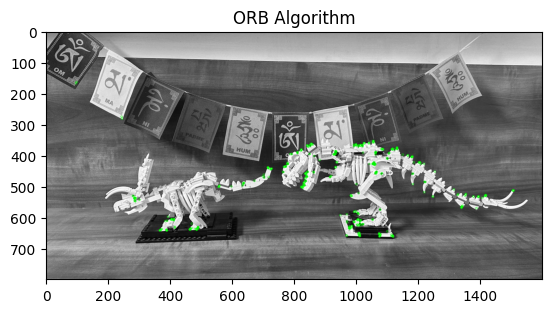

In [7]:
orb = cv.ORB_create()
kp = orb.detect(img1,None)

kp, des = orb.compute(img1, kp)

imgResult = cv.drawKeypoints(img1, kp, None, color=(0,255,0), flags=0)
plt.title('ORB Algorithm')
plt.imshow(imgResult)
plt.show()

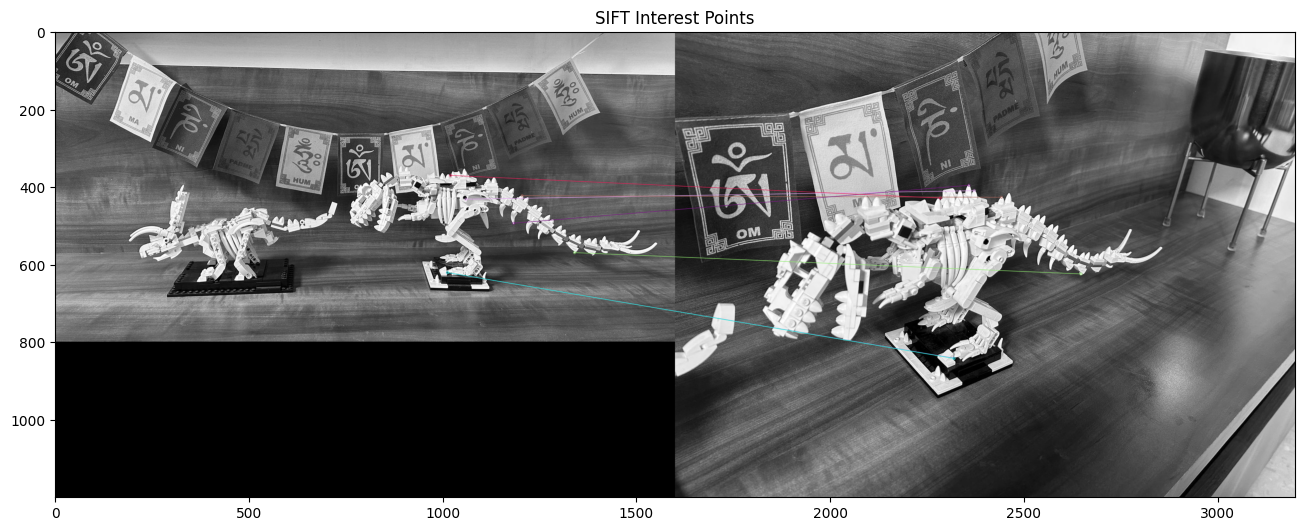

In [8]:

kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)


bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(16, 16))
plt.title('SIFT Interest Points')
plt.imshow(img3)
plt.show()

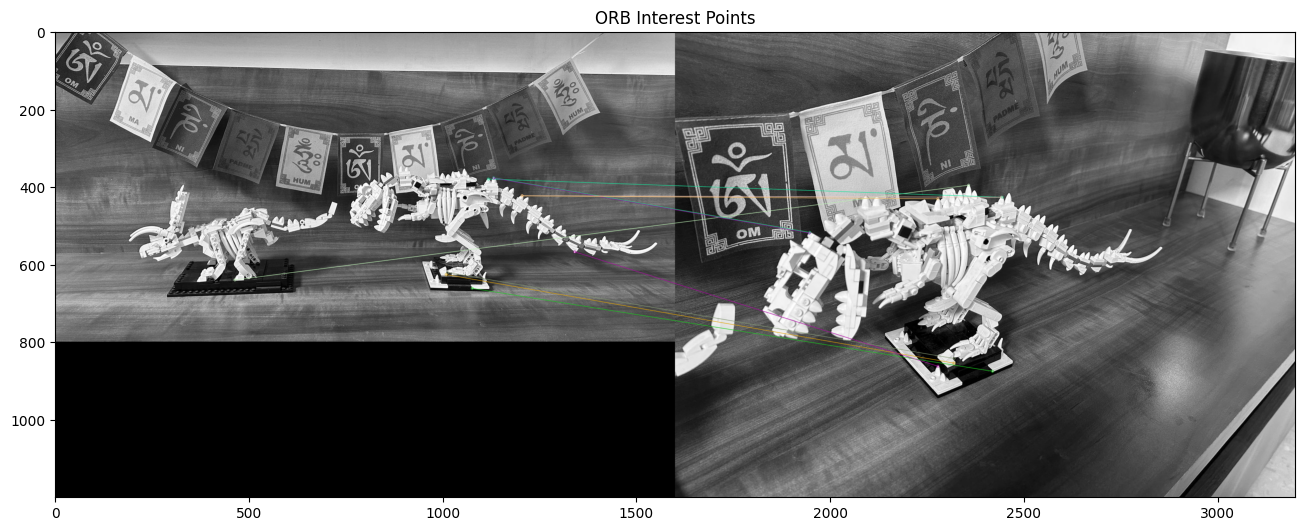

In [9]:
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(16, 16))
plt.title('ORB Interest Points')
plt.imshow(img3)
plt.show()